In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/raw/first_dataset_lyrics_only.csv')

In [3]:
data.value_counts('genre')
data.head()

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics
0,Pop,Adel Tawil,Lieder,2013,Immer da,2010,256740,Immer da by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}",Immer da Lyrics\r\n\r\nManchmal hast du gar ni...
1,Pop,Adel Tawil,Lieder,2013,Wenn Du liebst,2010,256742,Wenn du liebst by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 4, 'hot': False, 'p...",Wenn du liebst Lyrics\r\nGanz allein im schwar...
2,Pop,Adel Tawil,Lieder,2013,Lieder,2010,236655,Lieder by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Lieder Lyrics\r\n\r\nIch ging wie ein Ägypter\...
3,Pop,Adel Tawil,Lieder,2013,Weinen,2010,256745,Weinen by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Weinen Lyrics\r\n\r\nDu warst die ganze Welt f...
4,Pop,Adel Tawil,Lieder,2013,Unter Wasser,2010,256747,Unter Wasser by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}","Unter Wasser Lyrics\r\n\r\nKeine Chance, es is..."


# 1.In welchem Monat wurden die meisten Songs released nach Genre (oder allgemein)

In [4]:
# Extrahiere den Monat aus der Spalte "release_date_for_display" und füge ihn in eine neue Spalte namens "month" ein
data["month"] = pd.to_datetime(data["release_date_for_display"]).dt.month

# Zeige das DataFrame mit der neuen "month"-Spalte an
data

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,month
0,Pop,Adel Tawil,Lieder,2013,Immer da,2010,256740,Immer da by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}",Immer da Lyrics\r\n\r\nManchmal hast du gar ni...,11.0
1,Pop,Adel Tawil,Lieder,2013,Wenn Du liebst,2010,256742,Wenn du liebst by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 4, 'hot': False, 'p...",Wenn du liebst Lyrics\r\nGanz allein im schwar...,11.0
2,Pop,Adel Tawil,Lieder,2013,Lieder,2010,236655,Lieder by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Lieder Lyrics\r\n\r\nIch ging wie ein Ägypter\...,11.0
3,Pop,Adel Tawil,Lieder,2013,Weinen,2010,256745,Weinen by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Weinen Lyrics\r\n\r\nDu warst die ganze Welt f...,11.0
4,Pop,Adel Tawil,Lieder,2013,Unter Wasser,2010,256747,Unter Wasser by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}","Unter Wasser Lyrics\r\n\r\nKeine Chance, es is...",11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Leg dein Gesicht an mein Gesicht Lyrics\r\nDu ...,NaN
4538,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Scheisse ist braun Lyrics\r\nWenn die Sonne un...,NaN
4539,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Mit offenen Armen LyricsWolfgang Petry - Anfan...,NaN
4540,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Keine Lust auf gar nichts,2000,710594,Die romantische Schule - Kapitel 3 by Heinrich...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die romantische Schule - Kapitel 3 Lyrics ...,NaN


TypeError: 'numpy.float64' object cannot be interpreted as an integer

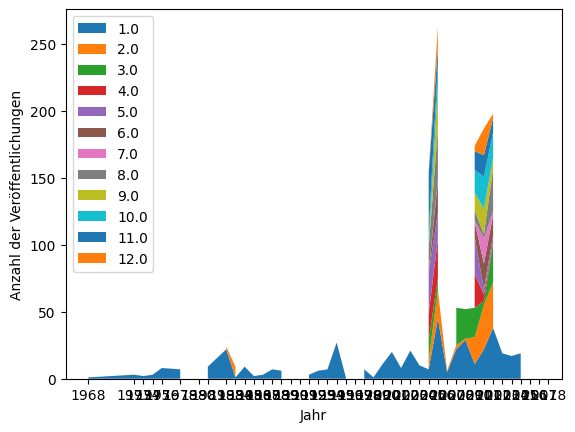

In [5]:
import matplotlib.pyplot as plt

# Gruppiere nach Jahr und Monat und zähle die Anzahl der Songs
songs_per_year_month = data.groupby(["release_year", "month"])["songtitle"].count().unstack()

# Plotten der gestapelten Linien
plt.stackplot(songs_per_year_month.index, songs_per_year_month.values.T, labels=songs_per_year_month.columns)

# Einstellungen für das Diagramm
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Veröffentlichungen")
plt.legend(loc="upper left")

# Anpassung der Achsenbeschriftungen
plt.xticks(songs_per_year_month.index)
plt.yticks(range(0, songs_per_year_month.values.max() + 1))

# Anzeigen des Diagramms
plt.show()


# Wie man oben sieht sind zwischen 1968 und ca. 2000 wohl meist im November Songs veröffentlicht worden zur besseren Darstellung werden die Jahre eingegrenzt


ValueError: cannot convert float NaN to integer

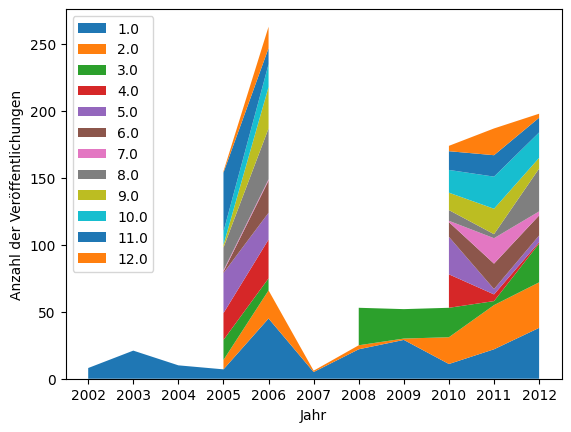

In [10]:
import matplotlib.pyplot as plt

# Filtere den Zeitraum von 2002 bis 2012
filtered_data = data[(data["release_year"] >= 2002) & (data["release_year"] <= 2012)]

# Gruppiere nach Jahr und Monat und zähle die Anzahl der Songs
songs_per_year_month = filtered_data.groupby(["release_year", "month"])["songtitle"].count().unstack()

# Plotten der gestapelten Linien
plt.stackplot(songs_per_year_month.index, songs_per_year_month.values.T, labels=songs_per_year_month.columns)

# Einstellungen für das Diagramm
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Veröffentlichungen")
plt.legend(loc="upper left")

# Anpassung der Achsenbeschriftungen
plt.xticks(songs_per_year_month.index)
plt.yticks(range(0, int(songs_per_year_month.values.max()) + 1))  # Konvertiere das Maximum zu einer Ganzzahl

# Anzeigen des Diagramms
plt.show()


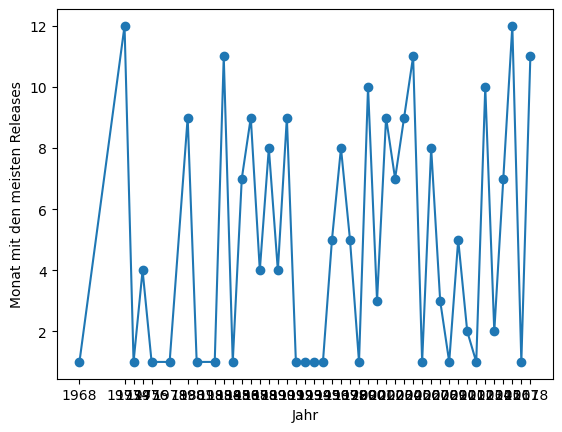

In [58]:

import matplotlib.pyplot as plt

# Gruppiere nach Jahr, Monat und Genre und summiere die Anzahl der Songs
songs_per_year_month_genre = data.groupby(["release_year", "month"])["songtitle"].count()

# Finde für jedes Jahr den Monat mit den meisten Releases
max_months_per_year = songs_per_year_month_genre.reset_index().groupby("release_year").apply(lambda x: x.loc[x["songtitle"].idxmax()]["month"])

# Plotten der Ergebnisse
plt.plot(max_months_per_year.index, max_months_per_year, marker='o')
plt.xticks(max_months_per_year.index)
plt.xlabel("Jahr")
plt.ylabel("Monat mit den meisten Releases")
plt.show()


#44 Jahre 
#Häufigster Monat 1. Januar, 2. September, keiner im Juni



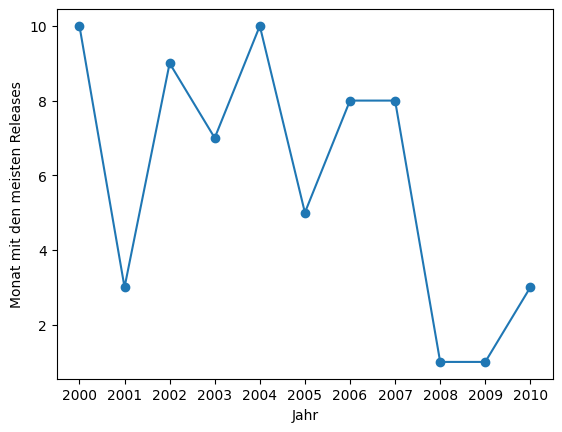

In [49]:
import matplotlib.pyplot as plt

# Filter data to years 2000-2010
data_2000_2010 = data[(data["release_year"] >= 2000) & (data["release_year"] <= 2010)]

# Gruppiere nach Jahr, Monat und Genre und summiere die Anzahl der Songs
songs_per_year_month_genre = data_2000_2010.groupby(["release_year", "month", "genre"])["songtitle"].count()

# Finde für jedes Jahr den Monat mit den meisten Releases
max_months_per_year = songs_per_year_month_genre.reset_index().groupby("release_year").apply(lambda x: x.loc[x["songtitle"].idxmax()]["month"])

# Plotten der Ergebnisse
plt.plot(max_months_per_year.index, max_months_per_year, marker='o')
plt.xticks(max_months_per_year.index)
plt.xlabel("Jahr")
plt.ylabel("Monat mit den meisten Releases")
plt.show()


In [44]:
data_2013 = data[data["release_year"] == 2013]

# Gruppiere nach Monat und Genre und summiere die Anzahl der Songs
songs_per_month_genre = data_2013.groupby(["month", "genre"])["songtitle"].count()

# Zeige das Ergebnis an
print(songs_per_month_genre)


month  genre   
1.0    Pop          9
       Rap          8
       Rock         1
       Schlager     1
3.0    Pop          1
       Rap          1
       Rock         2
4.0    Rap         11
       Rock         8
5.0    Pop          2
       Rap          1
       Rock         8
6.0    Rap         14
       Rock         1
7.0    Rap          5
8.0    Rap         18
9.0    Rap         18
       Schlager     4
10.0   Rap         14
       Rock         2
       Schlager    15
11.0   Pop         14
       Rap         11
       Rock         5
12.0   Rap          3
       Schlager     4
Name: songtitle, dtype: int64


# 2.Welche Orte werden in Rap Songs genannt auf Landkarte Visualisieren

In [66]:
!pip install geotext
!pip install geopy
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 2.9 MB/s eta 0:00:00


In [64]:
import geotext
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
import pandas as pd

# Filtere Daten nur mit Lyrics
data_with_lyrics = data[data['lyrics'].notnull()]

# Extrahiere Städte aus den Lyrics
cities = []
for lyrics in data_with_lyrics['lyrics']:
    cities_in_lyrics = geotext.GeoText(lyrics).cities
    cities.extend(cities_in_lyrics)

# Entferne Duplikate und sortiere die Städte
cities = sorted(list(set(cities)))

# Bestimme Koordinaten für jede Stadt
latitudes = []
longitudes = []
for city in cities:
    location = geolocator.geocode(city)
    if location is not None:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)

# Erstelle eine DataFrame mit den Städten und ihren Koordinaten
city_df = pd.DataFrame({'City': cities, 'Latitude': latitudes, 'Longitude': longitudes})



test

In [70]:
most_common_city = city_df["City"].value_counts().index[0]
print("Die am häufigsten vorkommende Stadt ist:", most_common_city)



Die am häufigsten vorkommende Stadt ist: Aachen


In [67]:
import folium

# Erstelle Karte
map = folium.Map(location=[30, 0], zoom_start=2)

# Füge Städte als Marker hinzu
for _, row in city_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(map)

# Zeige die Karte an
map

#Expections ans mistakes
#Obama in Japan, Along in  Micronesia, Darwin in Australia and Alisia in Phillipines


# 3.In wie vielen Songs kommt da Thema Liebe vor , pro Genre vielleicht

In [75]:
!pip install textblob

                                              0.0/636.8 kB ? eta -:--:--
     -------------------                   337.9/636.8 kB 20.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 9.9 MB/s eta 0:00:00


In [87]:
from textblob import TextBlob

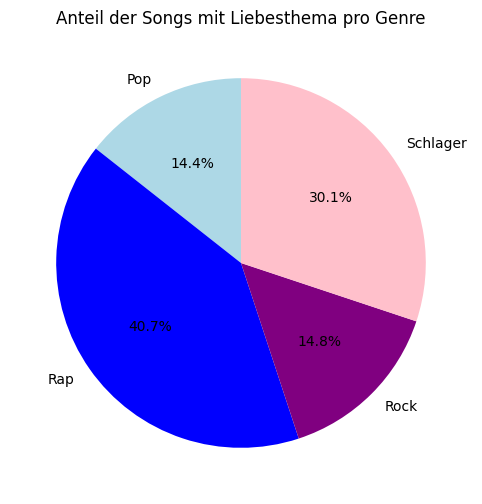

In [98]:
# 1. Lade die Liste der Liebeswörter
with open("C:/Users/marcb/Desktop/Studium/6.Semester/Projektarbeit II/statistik-1-team-2/data/raw/liebe_sentiment.txt", "r", encoding="utf-8") as f:
    liebe_wörter = [line.strip() for line in f.readlines()]

# 2. Sentiment-Analyse auf dem Lyrics-Feld ausführen
data["sentiment"] = data["lyrics"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Durchsuche das DataFrame nach Liebesworten
data["contains_liebe"] = data["lyrics"].apply(lambda x: any([liebe_wort.lower() in x.lower() for liebe_wort in liebe_wörter]))

# 4. Gruppierung und Berechnung des Prozentsatzes der Songs pro Genre, die das Thema Liebe enthalten
liebe_prozent = data.groupby("genre")["contains_liebe"].mean() * 100

# 5. Visualisierung des Ergebnisses als Kreisdiagramm
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightblue', 'blue', 'purple', 'pink']
ax.pie(liebe_prozent, labels=liebe_prozent.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title("Anteil der Songs mit Liebesthema pro Genre")
plt.show()



